# 1.0 - Limpieza de datos: Notebook de Angie Alfonso
En este notebook voy a trabajar la parte relacionada con la **estructura de la vivienda, su exterior y las calificaciones de calidad**.  
El objetivo es dejar estas variables listas para el análisis y modelado, eliminando o corrigiendo valores nulos y asegurando que los tipos de datos sean los adecuados.


In [165]:
# --- CONFIGURACIÓN INICIAL ---
%load_ext autoreload
%autoreload 2

from housing_price_prediction.utils.paths import data_raw_dir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
raw_data_path = data_raw_dir() / "train.csv"
df_data_raw = pd.read_csv(raw_data_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Selección de las columnas a trabajar

Nos enfocaremos en las variables relacionadas con la **estructura**, **exterior** y **calidad** de las viviendas.  
- `OverallQual`, `OverallCond`: calificación general de calidad y condición.  
- `YearBuilt`, `YearRemodAdd`: año de construcción y remodelación.  
- `RoofStyle`, `RoofMatl`: tipo y material del techo.  
- `Exterior1st`, `Exterior2nd`: materiales exteriores principales.  
- `MasVnrType`, `MasVnrArea`: tipo y área del recubrimiento de mampostería.  
- `ExterQual`, `ExterCond`, `HeatingQC`: calidades y condiciones.  
- `Foundation`, `Heating`, `CentralAir`, `Electrical`: estructura base, tipo de calefacción, aire acondicionado y sistema eléctrico.


In [166]:
cols = [
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
    'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'
]

#Creacion de un sub-dataframe para trabajar con las variables asignadas evitando modificar accidentalmente la data original
df = df_data_raw[cols].copy()

## Exploración de los datos 


Revisión de los tipos de datos iniciales

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   OverallCond   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   RoofStyle     1460 non-null   object 
 5   RoofMatl      1460 non-null   object 
 6   Exterior1st   1460 non-null   object 
 7   Exterior2nd   1460 non-null   object 
 8   MasVnrType    588 non-null    object 
 9   MasVnrArea    1452 non-null   float64
 10  ExterQual     1460 non-null   object 
 11  ExterCond     1460 non-null   object 
 12  Foundation    1460 non-null   object 
 13  Heating       1460 non-null   object 
 14  HeatingQC     1460 non-null   object 
 15  CentralAir    1460 non-null   object 
 16  Electrical    1459 non-null   object 
dtypes: float64(1), int64(4), object(12)
memory usage: 194.0+ KB


## Revisión de valores nulos 


Antes de dividir en variables categóricas y numéricas se hará un conteo de nulos para entender qué columnas necesitan más atención.

In [168]:
# Contar cuántos valores nulos hay en cada columna
df.isna().sum()

OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType      872
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
dtype: int64

# Análisis de variables categóricas 


In [169]:
cat_cols = [
    'MasVnrType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'ExterQual', 'ExterCond', 'HeatingQC'
]

df[cat_cols].head()


,MasVnrType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Electrical,ExterQual,ExterCond,HeatingQC
0,BrkFace,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Gd,TA,Ex
1,NaN,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,Y,SBrkr,TA,TA,Ex
2,BrkFace,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Gd,TA,Ex
3,NaN,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,Y,SBrkr,TA,TA,Gd
4,BrkFace,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Gd,TA,Ex


In [170]:
df[cat_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MasVnrType   588 non-null    object
 1   RoofStyle    1460 non-null   object
 2   RoofMatl     1460 non-null   object
 3   Exterior1st  1460 non-null   object
 4   Exterior2nd  1460 non-null   object
 5   Foundation   1460 non-null   object
 6   Heating      1460 non-null   object
 7   CentralAir   1460 non-null   object
 8   Electrical   1459 non-null   object
 9   ExterQual    1460 non-null   object
 10  ExterCond    1460 non-null   object
 11  HeatingQC    1460 non-null   object
dtypes: object(12)
memory usage: 137.0+ KB


- Se observa que `MasVnrType`  tienen varios nulos y se asume que los NaNs en las columnas se deben a la ausencia de mampostería en la vivienda. Se determinó que para este caso una imputación por **'None'** para MasVnrType es la estrategia más adecuada, tratando el nulo como una ausencia intencional.



## Corregir MasVnrType 

In [171]:
print("Distribución de MasVnrType antes de imputación:")
print(df['MasVnrType'].value_counts(dropna=False)) 

Distribución de MasVnrType antes de imputación:
MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


In [172]:
#Imputar nulos de MasVnrType con 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df.head()



,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical
0,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,GasA,Ex,Y,SBrkr
1,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,GasA,Ex,Y,SBrkr
2,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,GasA,Ex,Y,SBrkr
3,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,GasA,Gd,Y,SBrkr
4,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,GasA,Ex,Y,SBrkr


In [173]:
print("\nDistribución de MasVnrType después de imputación:")
print(df['MasVnrType'].value_counts(dropna=False))


Distribución de MasVnrType después de imputación:
MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


# Corregir variables de calidad ordinal 

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [174]:
caOrd_cols = ['ExterQual','ExterCond','HeatingQC']
print(df['ExterQual'].value_counts(dropna=False))
print(df['ExterCond'].value_counts(dropna=False))
print(df['HeatingQC'].value_counts(dropna=False))

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


Se concluye que aplicar una Codificación Ordinal (mapeo numérico) para transformar estas etiquetas de texto a una escala numérica (5 a 1) ayudaría a que los modelos interpreten correctamente su orden 

In [175]:
cal_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

#Como se observó que no hay valores nulos se prosiguió de una con el mapeo 

for col in caOrd_cols:
    df[col] = df[col].map(cal_map)

df[['ExterQual', 'ExterCond', 'HeatingQC']].head()


,ExterQual,ExterCond,HeatingQC
0,4,3,5
1,3,3,5
2,4,3,5
3,3,3,4
4,4,3,5


In [176]:
df.isnull().sum()

OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      1
dtype: int64

## Revisión de Nulos Simples 

Para las variables categóricas simples, se observó que `Electrical` contenia un único valor nulo por lo que se concluyó que el mejor camino sería la imputación por **moda**, ya que los valores faltantes eran pocos y no afectaban la distribución general.

In [177]:
print(df['Electrical'].value_counts(dropna=False)) 

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64


In [178]:
moda = df['Electrical'].mode()[0]
df['Electrical'] = df['Electrical'].fillna(moda)

print(df['Electrical'].value_counts(dropna=False)) 

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


In [179]:
df[cat_cols].isnull().sum()

MasVnrType     0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
Foundation     0
Heating        0
CentralAir     0
Electrical     0
ExterQual      0
ExterCond      0
HeatingQC      0
dtype: int64

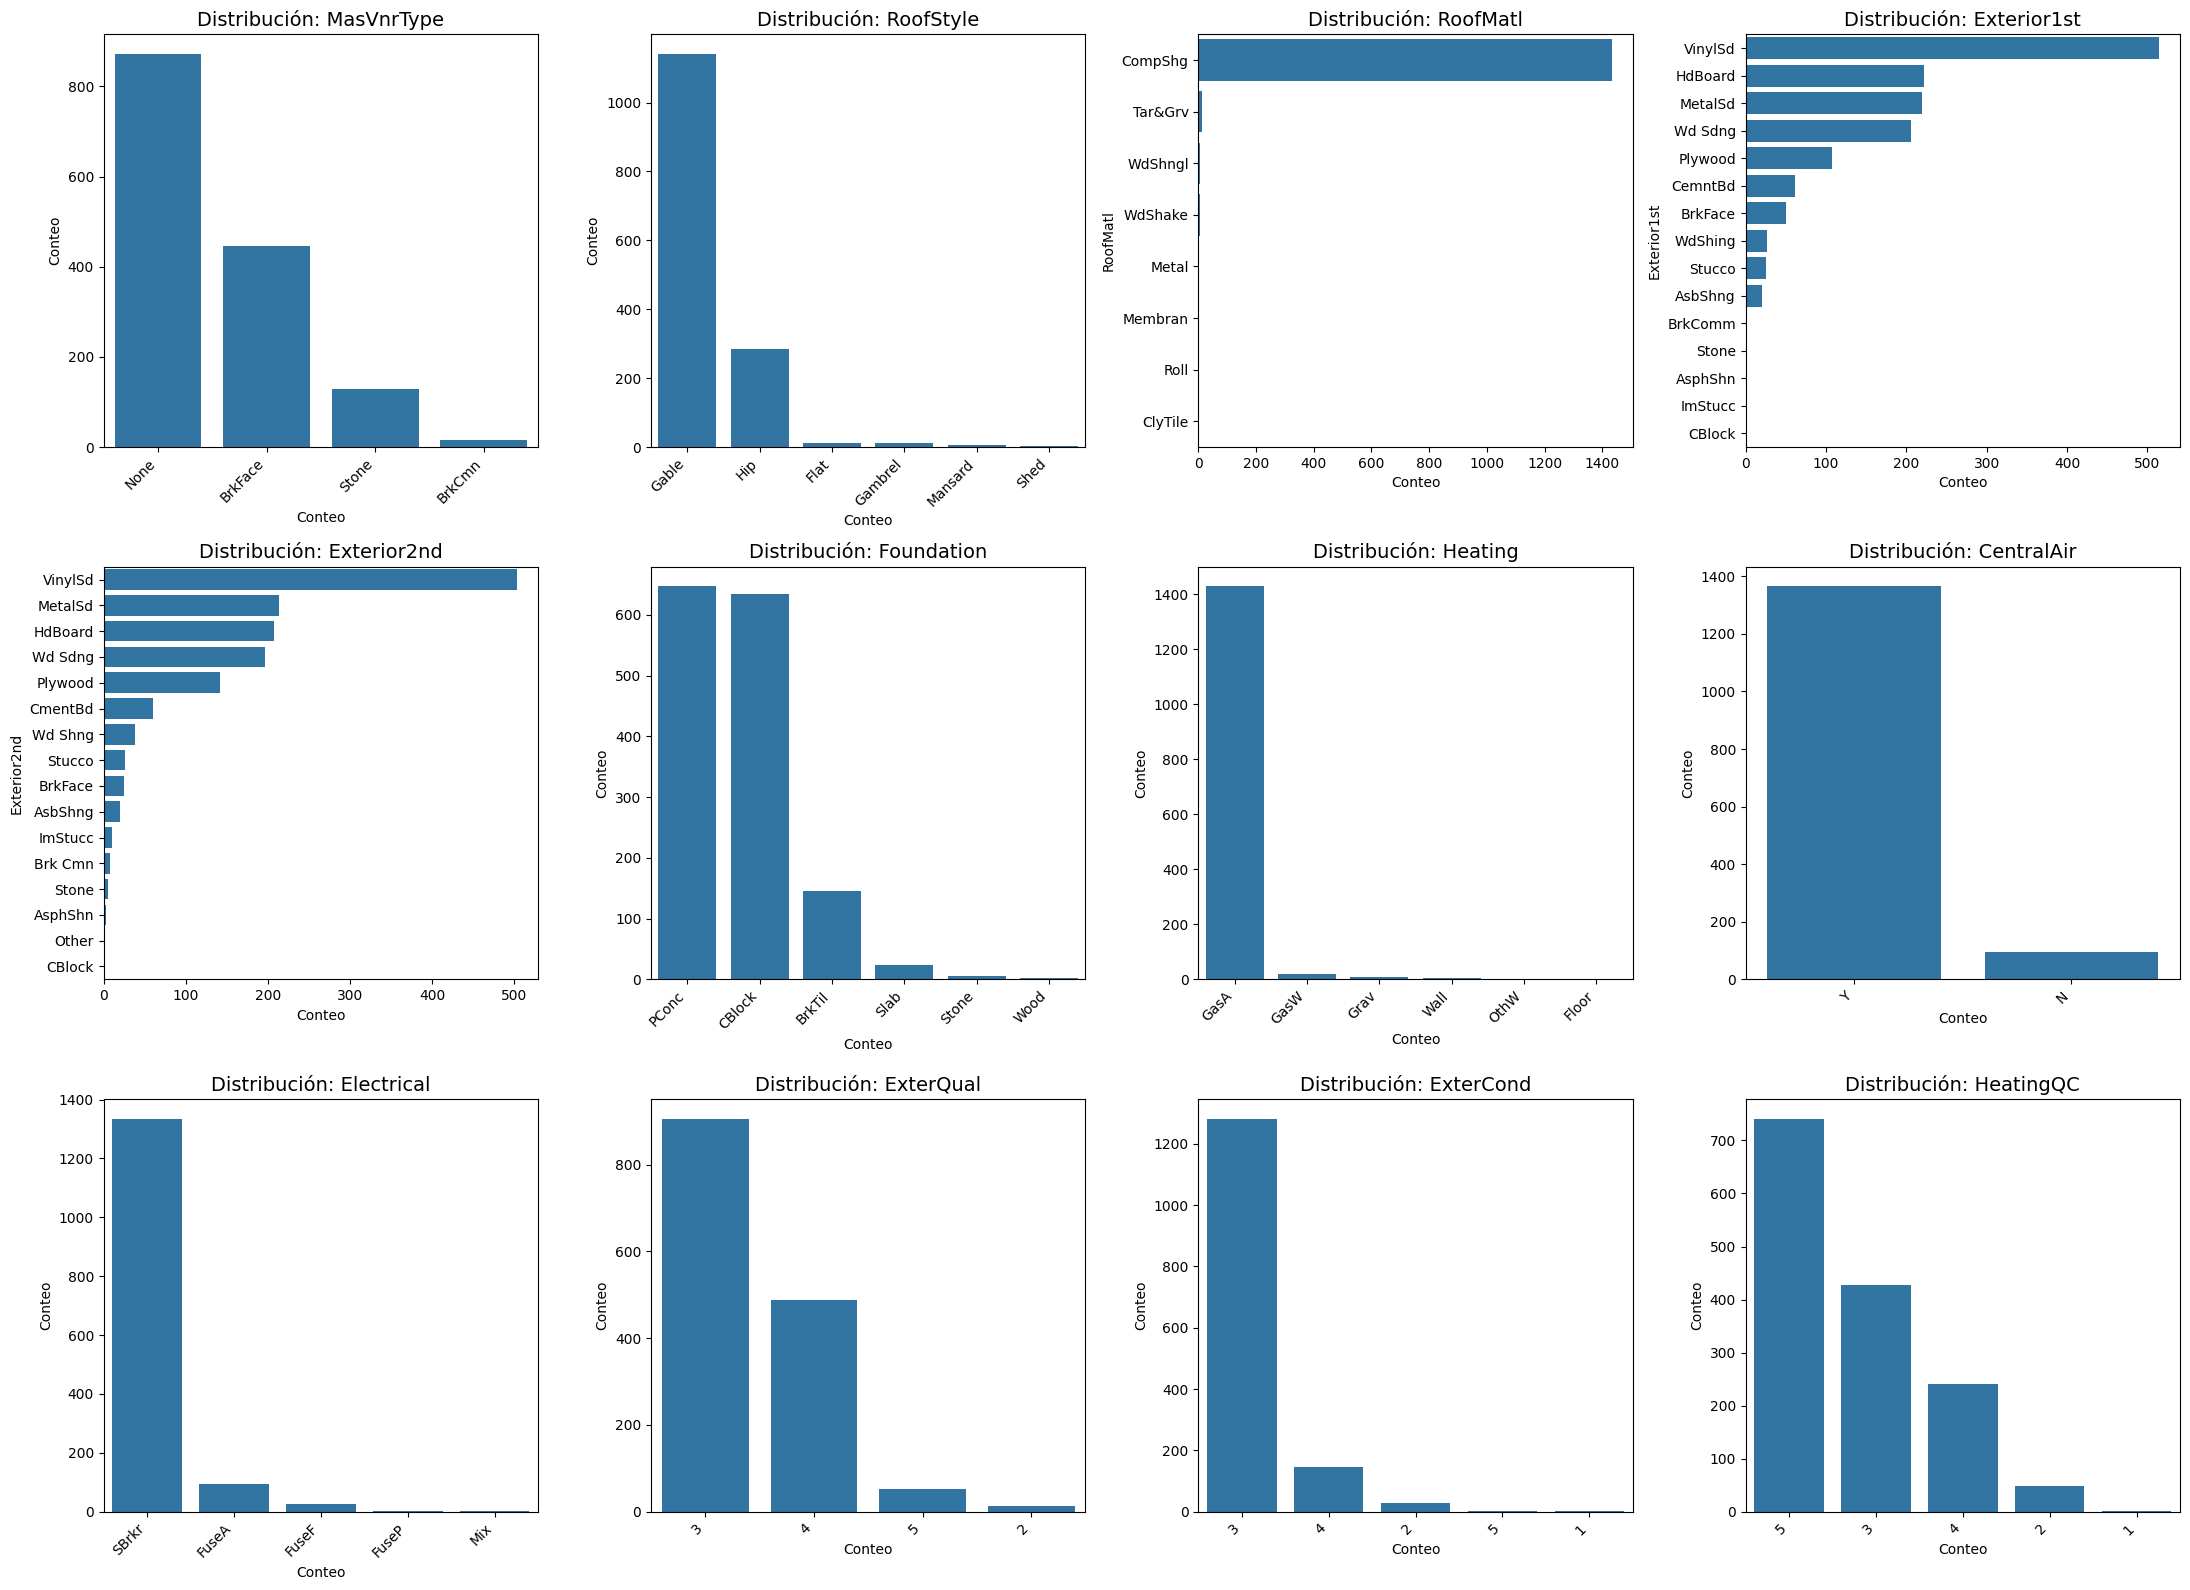

In [180]:
#Secuencia de gráficos para revisar las variables
n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    es_ancho = (df[col].nunique() > 6)
    sns.countplot(y=df[col] if es_ancho else None,x=df[col] if not es_ancho else None,ax=axes[i], order=df[col].value_counts().index if es_ancho else df[col].value_counts().index)

    axes[i].set_title(f'Distribución: {col}', fontsize=14)
    axes[i].set_xlabel('Conteo', fontsize=10)
    axes[i].set_ylabel(col if es_ancho else 'Conteo', fontsize=10)
    if not es_ancho:
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout() 

Se creo gráficos para una mejor visualización de las variables y verificar que haya concordancia, y se identificó que en Exterior2nd la cual comparte variables con Exterior1st contenía la variable `CmentBd` escrita diferente a la que se almacena en Exterior1st, igualmente las variables `Brk Cmn`, `Wd Shng` que poseían espacio entre la misma variable, fueron normalizadas para mantener consistencia.

In [181]:
df['Exterior2nd'] = df['Exterior2nd'].replace({
    'Brk Cmn': 'BrkComm',
    'CmentBd': 'CemntBd',
    'Wd Shng': 'WdShing'
})

# Análisis de variables numéricas 
En esta sección se revisan y limpian las variables numéricas asociadas con la estructura y calidad general de las viviendas:
- `MasVnrArea`: área del recubrimiento de mampostería (pies cuadrados)
- `YearBuilt`: año de construcción
- `YearRemodAdd`: año de remodelación
- `OverallQual`: calidad general
- `OverallCond`: condición general


## Manejo de MasVnrArea basándonos en MasVnrType

Se manejará con la lógica de que si la casa no tiene mampostería, esto quiere decir, que MasVnrType = 'None' entonces el área MasVnrArea debe ser 0

In [182]:
print(df['MasVnrArea'].value_counts(dropna=False))
df['MasVnrArea'] = df['MasVnrArea'].fillna('None')
print(df['MasVnrArea'].value_counts(dropna=False))


MasVnrArea
0.0      861
108.0      8
NaN        8
72.0       8
180.0      8
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 328, dtype: int64
MasVnrArea
0.0      861
108.0      8
None       8
72.0       8
180.0      8
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 328, dtype: int64


In [183]:
#Como nos basaremos en las etiquetas para realizar las modificaciones se usará la función .loc[] para el manejo
df.loc[df['MasVnrType'] == 'None', 'MasVnrArea'] = 0

In [184]:
df.isnull().sum()

OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
dtype: int64

## Verificación de variables YearBuilt y YearRemodAdd

Verificar si ambas columnas contengan valores solamente de tipo entero y asegurarnos que YearRemodAdd sea menor YearBuilt para que los datos tengan sentido

In [185]:
print(df[['YearBuilt', 'YearRemodAdd']].dtypes)


YearBuilt       int64
YearRemodAdd    int64
dtype: object


Se comprobó que ambas son tipo entero y esto asegura que fueron correctamente interpretados al cargar el dataset por lo que no fue necesario realizar conversiones adicionales

In [186]:
cont = df['YearRemodAdd'] < df['YearBuilt']
print(cont.sum())

0


Se comprobó que no existen casos donde el año de remodelación sea anterior al año de construcción y esto confirma que los datos son coherentes por lo que no requieren corrección en esta variable

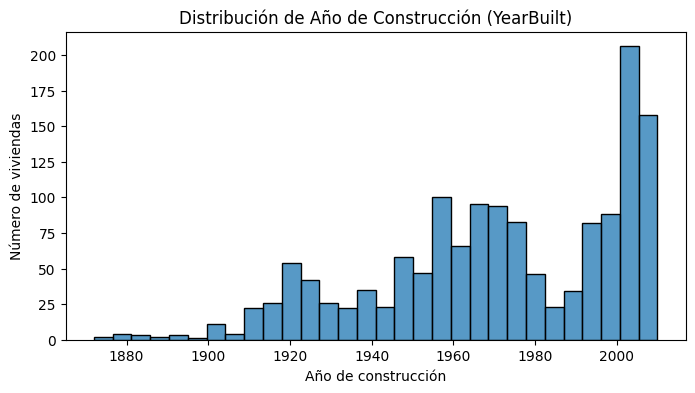

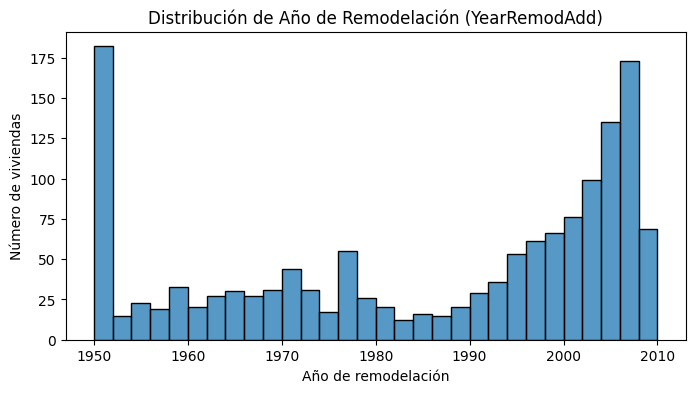

In [187]:
plt.figure(figsize=(8,4))
sns.histplot(df['YearBuilt'], bins=30, kde=False)
plt.title('Distribución de Año de Construcción (YearBuilt)')
plt.xlabel('Año de construcción')
plt.ylabel('Número de viviendas')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['YearRemodAdd'], bins=30, kde=False)
plt.title('Distribución de Año de Remodelación (YearRemodAdd)')
plt.xlabel('Año de remodelación')
plt.ylabel('Número de viviendas')
plt.show()

Los histogramas confirman que los años de construcción y remodelación se concentran entre 1900 y 2010, lo que coincide con los rangos históricos esperados del dataset. Asimismo, no se detectaron valores anómalos ni concentraciones extrañas tras la limpieza.


In [189]:
df.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical
0,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,GasA,5,Y,SBrkr
1,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,GasA,5,Y,SBrkr
2,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,GasA,5,Y,SBrkr
3,7,5,1915,1970,Gable,CompShg,Wd Sdng,WdShing,None,0,3,3,BrkTil,GasA,4,Y,SBrkr
4,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,GasA,5,Y,SBrkr
